# Building KNN Model

## by Roger Burek-Bors - May 7, 2021 - Warsaw, Poland 

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import pickle
%matplotlib inline
print("Libraries loaded")

Libraries loaded


### Loading Data From CSV File

In [2]:
df = pd.read_csv('data_training.csv')
df.head()

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,...,Age_Bucket_labels,Ntm_Speciality_labels,Ntm_Specialist_Flag_labels,Ntm_Speciality_Bucket_labels,Risk_Segment_Prior_Ntm_labels,Tscore_Bucket_Prior_Ntm_labels,Tscore_Bucket_During_Rx_labels,Change_T_Score_labels,Change_Risk_Segment_labels,Adherent_Flag_labels
0,0,0,0,0,0,0,0,1,0,1,...,3.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0,1,0,0,0,0,0,1,0,1,...,3.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,1,0,0,0,0,0,1,1,1,...,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,1,0,0,0,0,0,1,0,0,...,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Feature set

In [3]:
df.columns

Index(['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_es

In [7]:
X = df[['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Family_History_Of_Osteoporosis', 'Risk_Vitamin_D_Insufficiency',
       'Count_Of_Risks', 'Race_labels',
       'Ethnicity_labels', 'Region_labels', 'Age_Bucket_labels',
       'Ntm_Speciality_labels', 'Ntm_Specialist_Flag_labels',
       'Ntm_Speciality_Bucket_labels', 'Risk_Segment_Prior_Ntm_labels',
       'Tscore_Bucket_Prior_Ntm_labels', 'Tscore_Bucket_During_Rx_labels',
       'Change_T_Score_labels', 'Change_Risk_Segment_labels',
       'Adherent_Flag_labels']].values
X[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 2., 1., 3., 3., 5., 0., 1., 1., 1., 0., 1.,
        1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 2., 1., 0., 3., 5., 0., 1., 0., 1., 0., 1.,
        1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 2., 1., 0., 3., 5., 0., 1., 0., 0., 0., 1.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 2., 2., 1., 0., 3., 5., 0., 1., 0., 0., 0., 1.,
        1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 

In [8]:
y = df['Persistency_Flag_labels'].values
y[0:5]

array([1., 0., 0., 0., 0.])

### Data Normalization

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.57811853, -0.54890682,  0.        ,  0.        , -0.41216187,
        -0.32832052, -1.66553634,  0.38097619, -0.73347751,  1.31680294,
         1.45486795, -0.62197364, -0.56582515,  2.25227158, -0.46080495,
         2.11198733,  2.33763045, -0.32551538, -0.96565915, -0.52035303,
        -0.44238451, -0.41464421, -0.70076489, -0.67792151, -0.57581374,
        -0.59579323, -0.43672742, -0.41133304, -0.39290951, -0.33296358,
        -0.33848448, -0.29456391, -0.46239573, -0.37925666, -0.3292523 ,
        -0.9028939 , -1.10718783,  0.        ,  0.        ,  1.57916068,
         1.02367324, -0.52541814, -0.76268541, -0.03045934,  0.87946082,
         0.86526938, -1.01407104, -0.06295592, -0.17531365,  0.        ],
       [-0.57811853,  1.82180282,  0.        ,  0.        , -0.41216187,
        -0.32832052, -1.66553634,  0.38097619, -0.73347751,  1.31680294,
         1.45486795, -0.62197364,  1.76733041, -0.44399619, -0.46080495,
         2.11198733, -0.42778361, -0.32551538,  1.

### Train Test Split 20:80

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1603, 50) (1603,)
Test set: (401, 50) (401,)


### Classification

In [27]:
#Training Model
k = 4
classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
classifier

KNeighborsClassifier(n_neighbors=4)

In [28]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 0., 0., 0., 0.])

### Accuracy evaluation

In [29]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8234560199625702
Test set Accuracy:  0.7930174563591023


In [30]:
# Accuracy for other "K"
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=classifier.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77057357, 0.79052369, 0.77057357, 0.78553616, 0.78054863,
       0.78802993, 0.79052369, 0.79052369, 0.79301746])

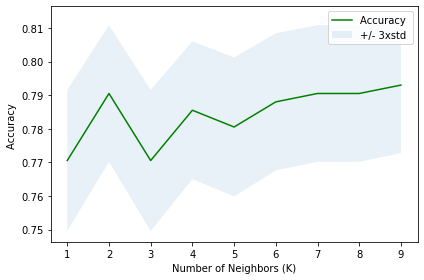

In [31]:
# Plotting model accuracy for different number of "K"
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [60]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.7930174563591023 with k = 9


Text(0.5, 1.0, '2-class Precision-Recall curve')

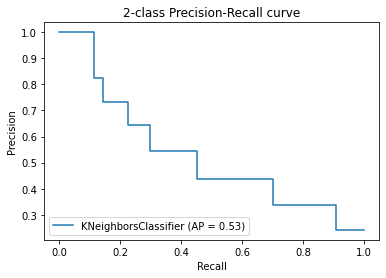

In [62]:
# Ploting the Precision-Recall curve for best accuracy "K"
classifier = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat = classifier.predict(X_test)
disp = plot_precision_recall_curve(neigh, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

In [64]:
# F1 score for best accuracy "K"
average_mode = ['macro', 'micro', 'weighted']
for avr in average_mode:
    f1 = f1_score(y_test, yhat, average=avr)
    print('F1 score for {} mode'.format(avr), f1)

F1 score for macro mode 0.6117468649752115
F1 score for micro mode 0.7930174563591024
F1 score for weighted mode 0.748692165765231


### Train Test Split 40:60

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)
k = 4
classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [66]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8178036605657238
Test set Accuracy:  0.816708229426434


In [67]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=classifier.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74937656, 0.78802993, 0.78927681, 0.79301746, 0.79800499,
       0.79301746, 0.79426434, 0.79301746, 0.7967581 ])

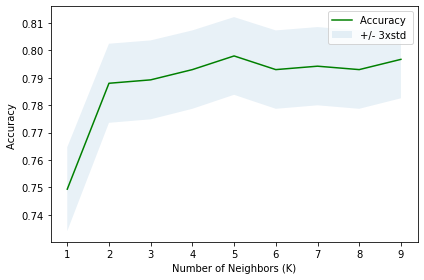

In [68]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [69]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.7980049875311721 with k = 5


### Saving best model k=9 for 20-80% data split

In [70]:
k = 9
classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [71]:
with open('KNN_model_Roger.pkl', 'wb') as f:
    pickle.dump(classifier, f)